In [1]:
#x <- read.csv("Intervals_092014_012016.csv",colClasses = c("character","numeric","numeric","character"),header=TRUE)
library(data.table,lib.loc="../Rpackages")

ERROR: Error in library(data.table, lib.loc = "../Rpackages"): no library trees found in 'lib.loc'


In [33]:
library(data.table)
full = c();

#for i in 0:80)
x <- fread("gunzip -c tmp.gz",
           #colClasses=c("character","double","double","character","double"),
           header=TRUE,sep=",",na.strings="")
#full= rbind(full, x)    

In [4]:
# need t
#x <- fread("gunzip -c Intervals_092014_012016.csv.gz",
#           colClasses=c("character","double","double","character","double"),
#           header=TRUE,sep=",",na.strings="")


ERROR: Error in fread("gunzip -c Intervals_092014_012016.csv.gz", colClasses = c("character", : Expected sep (',') but '' ends field 2 when detecting types from point 10: "123053469",8662.159,8680.9


In [2]:
summary(x)

 MR_MDVC_NUMBER       START_READ          END_READ        INTERVAL_TIME     
 Length:999999      Min.   :   56.08   Min.   :   56.16   Length:999999     
 Class :character   1st Qu.: 4322.84   1st Qu.: 4337.57   Class :character  
 Mode  :character   Median : 7313.10   Median : 7327.62   Mode  :character  
                    Mean   : 8241.84   Mean   : 8262.66                     
                    3rd Qu.:10886.02   3rd Qu.:10910.36                     
                    Max.   :74214.38   Max.   :74518.61                     
                    NA's   :96                                              
 INTERVAL_READ    
 Min.   : 0.0000  
 1st Qu.: 0.0588  
 Median : 0.1176  
 Mean   : 0.1813  
 3rd Qu.: 0.2148  
 Max.   :10.8504  
 NA's   :96       

In [7]:
str(x)

Classes 'data.table' and 'data.frame':	55281458 obs. of  5 variables:
 $ MR_MDVC_NUMBER: chr  "123053022" "123053022" "123053022" "123053022" ...
 $ START_READ    : num  8486 8486 8486 8486 8486 ...
 $ END_READ      : num  8498 8498 8498 8498 8498 ...
 $ INTERVAL_TIME : chr  "01-SEP-2014 00:15:00" "01-SEP-2014 00:30:00" "01-SEP-2014 00:45:00" "01-SEP-2014 01:00:00" ...
 $ INTERVAL_READ : num  0.148 0.101 0.141 0.231 0.262 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [28]:
table(table(x[,1]))



1311 2112 2880 2976 5760 
   1    1  329    1    8 

In [3]:
good = names(table(x[,1]))[table(x[,1])==2880];

In [4]:
mm=match(as.matrix(x[,1]),good)

In [9]:
x1 = x[!is.na(mm),]

In [10]:
dim(x1)

[1] 947520      5

In [23]:
res = c();
for (i in 1:329){
    res = cbind(res, as.matrix(x[((i-1)*2880+1):(i*2880),5]))
}
res = t(res)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


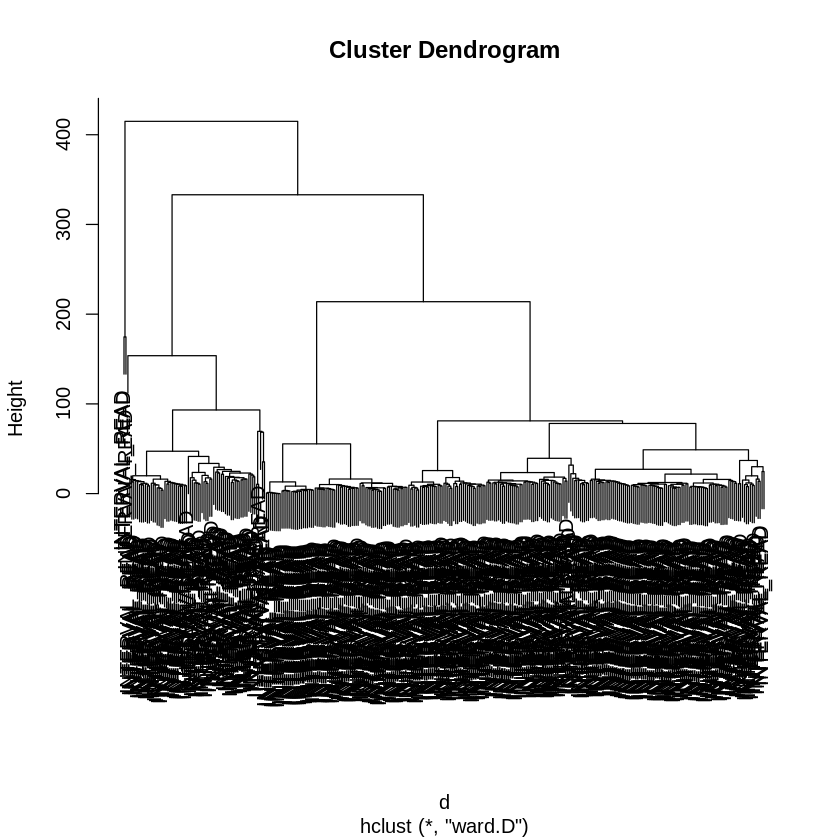

In [24]:
d <- dist(res, method = "euclidean") # distance matrix
fit <- hclust(d, method="ward") 
plot(fit) # display dendogram

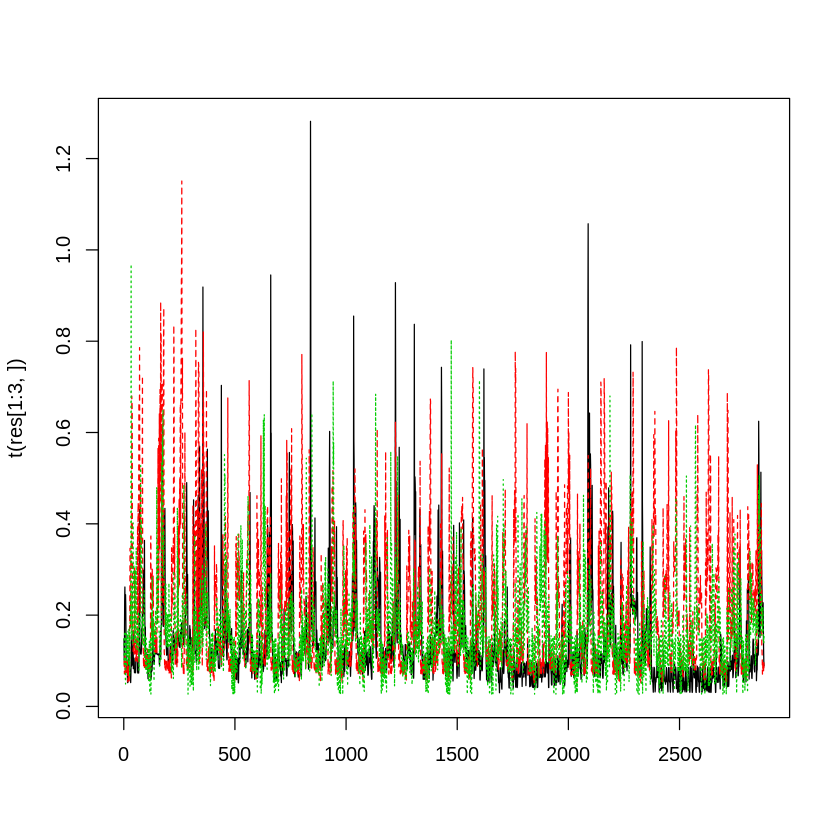

In [29]:
matplot(t(res[1:3,]),type="l")

In [8]:
#get 5 highest samples
tot = tapply(x$INTERVAL_READ, x$MR_MDVC_NUMBER, sum, na.rm=T)
qtot = quantile(tot,0:10/10);

o = order(-tot);
top = names(tot[o][1:5]);
x_top <- x[match(x$MR_MDVC_NUMBER, top, nomatch=0)>0,]

mid = names(tot[tot<qtot[6]&tot>=qtot[5]])[1:5];
x_mid <- x[match(x$MR_MDVC_NUMBER, mid, nomatch=0)>0,]

bot = names(tot[tot<qtot[3]&tot>=qtot[2]])[1:5];
x_bot <- x[match(x$MR_MDVC_NUMBER, bot, nomatch=0)>0,]

In [13]:
my_plot <- function(tmp_df, i, q){
    name <- paste(i,"_",q,"_full",".jpeg",sep="")
    jpeg(name)
    par(mfrow=c(4,2))
    plot(filter(tmp_df[tmp_df$MR_MDVC_NUMBER==i,]$INTERVAL_READ,c(1,2,3,4,5,4,3,2,1)/(25)),main=i)
    acf(tmp_df[tmp_df$MR_MDVC_NUMBER==i,]$INTERVAL_READ,lag=24*4,main=i,na.action=na.pass)
    acf(tmp_df[tmp_df$MR_MDVC_NUMBER==i,]$INTERVAL_READ,type="partial",lag=24*4,main=i,na.action=na.pass)
    acf(diff(tmp_df$INTERVAL_READ),main=i,na.action=na.pass)
    dev.off()
}

In [14]:
unique(x_bot$MR_MDVC_NUMBER)
for(i in unique(x_bot$MR_MDVC_NUMBER)){
    my_plot(x_bot,i,"bot_big")
    print(i)
}
unique(x_top$MR_MDVC_NUMBER)
for(i in unique(x_top$MR_MDVC_NUMBER)){
    my_plot(x_top,i,"top_big")
    print(i)
}
unique(x_mid$MR_MDVC_NUMBER)
for(i in unique(x_mid$MR_MDVC_NUMBER)){
    my_plot(x_mid,i,"mid_big")
    print(i)
}

[1] "123053025" "123053106" "123053137" "123053169" "123053053"

[1] "123053025"
[1] "123053106"
[1] "123053137"
[1] "123053169"
[1] "123053053"


[1] "123053036" "123053040" "123053916" "123054013" "123054329"

[1] "123053036"
[1] "123053040"
[1] "123053916"
[1] "123054013"
[1] "123054329"


[1] "123053028" "123053035" "123053089" "123053092" "123053103"

[1] "123053028"
[1] "123053035"
[1] "123053089"
[1] "123053092"
[1] "123053103"
